In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy
import lightkurve as lk
from scipy import *
from astropy import constants as ac

In [2]:
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 20
rcParams["figure.figsize"] = [8, 5]
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans Serif"]
rcParams["text.usetex"] = True
plt.rcParams['axes.linewidth']=1.5

### Importing in targets from ExoPlots

https://ethankruse.github.io/exoplots/insolation-radius.html

In [3]:
l1 = pd.read_csv('/Users/lupitatovar/Cool-Worlds/targets/radius_iso_cut.csv',skiprows=1,
                 names=['Planet','Insolation','Period','Radius','Jup_Radius','Discovery','Status'])
l1

,Planet,Insolation,Period,Radius,Jup_Radius,Discovery,Status
0,Kepler-452 b,1.108504,384.843000,1.568324,0.139904,Kepler,Confirmed
1,Kepler-1649 c,0.942183,19.535270,1.069217,0.095381,Kepler,Confirmed
2,Kepler-1544 b,0.774587,168.811174,1.722270,0.153637,Kepler,Confirmed
3,Kepler-1410 b,1.060000,60.866168,1.780000,0.158787,Kepler,Confirmed
4,Kepler-296 f,0.620000,63.336270,1.800000,0.160571,Kepler,Confirmed
5,Kepler-283 c,0.966398,92.743711,1.944526,0.173464,Kepler,Confirmed
6,Kepler-62 f,0.509360,267.291000,1.533375,0.136786,Kepler,Confirmed
7,Kepler-442 b,1.007496,112.305300,1.375733,0.122724,Kepler,Confirmed
8,Kepler-1652 b,0.810000,38.097220,1.600000,0.142730,Kepler,Confirmed
9,Kepler-186 f,0.404084,129.944100,1.201500,0.107181,Kepler,Confirmed


In [4]:
kepler = l1[l1["Discovery"].str.contains("Kepler")]
k2 = l1[l1["Discovery"].str.contains("K2")]
tess = l1[l1["Discovery"].str.contains("TESS")]
other = l1[l1["Discovery"].str.contains("Mulitple Observatories|MEarth Project|La Silla Observatory|SPECULOOS Southern Observatory")]

In [5]:
print(len(l1))

21


### Re-creating exoplot style plot for specific targets of interest: https://ethankruse.github.io/exoplots/ 

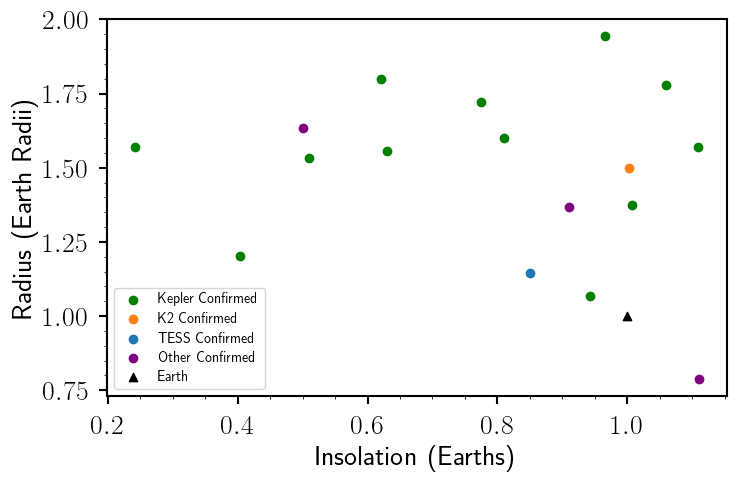

In [38]:
#plt.scatter(l1['Insolation'].values,l1['Radius'].values)
plt.scatter(kepler['Insolation'].values,kepler['Radius'].values,color = 'green', label = "Kepler Confirmed")
plt.scatter(k2['Insolation'].values,k2['Radius'].values,color = 'C1', label = "K2 Confirmed")
plt.scatter(tess['Insolation'].values,tess['Radius'].values,color = 'C0', label = "TESS Confirmed")
plt.scatter(other['Insolation'].values,other['Radius'].values,color = 'purple', label = "Other Confirmed")
plt.scatter(1,1,color='k',label='Earth',marker="^")


plt.xlabel('Insolation (Earths)')
plt.ylabel('Radius (Earth Radii)')
plt.tick_params(direction='out',width=1.5,length=6,pad=7)
plt.minorticks_on()
plt.legend(loc='lower left',fontsize=10)

#plt.savefig('21_targets.pdf',bbox_inches='tight')

Crossmatching with Ethan's exoplanet archive data file (https://raw.githubusercontent.com/ethankruse/exoplots/master/data/exoplots_data.csv) to get more data columns

In [7]:
full_table=pd.read_csv('https://raw.githubusercontent.com/ethankruse/exoplots/master/data/exoplots_data.csv')
##skiprows=,delim_whitespace=True,names=['',''])

In [148]:
(l1['Planet'].values)
#full_table['hostname'].values

array(['Kepler-452 b', 'Kepler-1649 c', 'Kepler-1544 b', 'Kepler-1410 b',
       'Kepler-296 f', 'Kepler-283 c', 'Kepler-62 f', 'Kepler-442 b',
       'Kepler-1652 b', 'Kepler-186 f', 'Kepler-441 b', 'Kepler-1229 b',
       'K2-3 d', 'TRAPPIST-1 h', 'LP 890-9 c', 'TRAPPIST-1 g',
       'LHS 1140 b', 'TRAPPIST-1 f', 'TRAPPIST-1 e', 'TRAPPIST-1 d',
       'TOI-700 d'], dtype=object)

In [149]:
(quick['Planet'].values)

array(['HD 219134 f', 'Kepler 11 b', 'Kepler 60 b', 'Kepler 60 c',
       'Kepler 60 d', 'Kepler 62 c', 'Kepler 68 c', 'Kepler 80 e',
       'Kepler 93 b', 'Kepler 114 c', 'Kepler 138 b', 'Kepler 138 c',
       'Kepler 138 d', 'Kepler 186 b', 'Kepler 186 c', 'Kepler 186 d',
       'Kepler 186 e', 'Kepler 186 f', 'Kepler 414 b', 'L 98-59 d',
       'LHS 1140 b', 'LHS 1140c', 'Trappist-1 b', 'Trappist-1 c',
       'Trappist-1 d', 'Trappist-1 e', 'Trappist-1 f', 'Trappist-1 g',
       'Trappist-1 h'], dtype=object)

In [55]:
full_table['masse'].values

array([250. ,  16.6,   nan, ...,   nan,   nan,   nan])

In [107]:
frames = [l1,full_table]

l1_masses = pd.concat(frames, axis=1, join="inner")
#l1_masses.to_csv('/Users/lupitatovar/Cool-Worlds/targets/targets_masses.csv')
#l1_masses = pd.read_csv('/Users/lupitatovar/Cool-Worlds/targets/targets_masses.csv')

In [110]:
l1_masses['masse'].values

array([2.5000000e+02, 1.6600000e+01,           nan,           nan,
                 nan, 6.1659020e+02, 4.2271390e+02, 5.7463664e+02,
       1.1441880e+02, 9.0300000e+01, 4.0364410e+03,           nan,
       5.3427223e+02, 1.1886842e+03, 2.1000000e+01, 1.5900000e+00,
       2.8604700e+02, 3.0511680e+02, 2.2056500e+02, 3.9300000e+00,
                 nan])

In [150]:
#l1_masses.to_csv('/Users/lupitatovar/Cool-Worlds/targets/targets_masses.csv')

In [8]:
#l1_masses = pd.read_csv('/Users/lupitatovar/Cool-Worlds/targets/targets_masses.csv')

In [11]:
#l1_masses

Cross matching with Lynnae's 2020 paper targets to see which ones are new targets

In [10]:
quick = pd.read_table('/Users/lupitatovar/Cool-Worlds/targets/quick_table2.csv',skiprows=3, 
                    names=['Planet','R_P','M_P','H_Rad Europa-like Structure','H_Rad for Ganymede-like Structure',
                           'H_Tidal','H_Total for Europa-like','H_Total for Ganymede-like','Type'])



In [152]:
#quick

In [12]:
comparison = pd.read_csv('/Users/lupitatovar/Cool-Worlds/targets/targets_masses.csv')

In [13]:
print(len(comparison))

13


(0.0, 10.0)

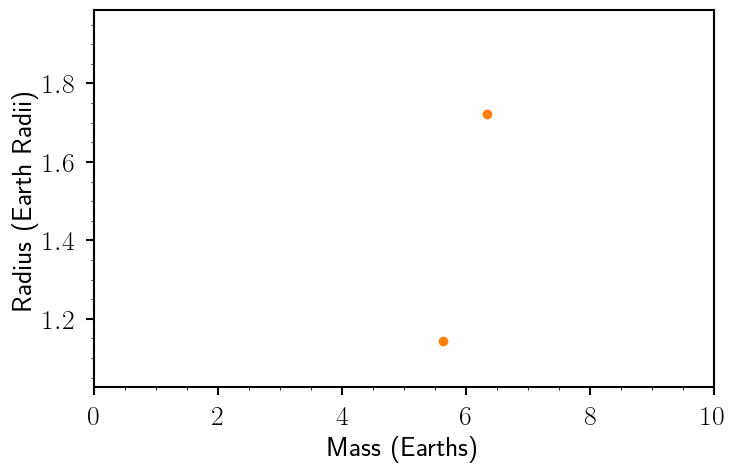

In [77]:
plt.scatter(comparison['masse'].values,comparison['Radius'].values)
plt.scatter(comparison['masse_est'].values,comparison['Radius'].values)
plt.xlabel('Mass (Earths)')
plt.ylabel('Radius (Earth Radii)')
plt.tick_params(direction='out',width=1.5,length=6,pad=7)
plt.minorticks_on()
plt.xlim(0,10)
#plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.,fontsize=14)

In [16]:
kepler_ = comparison[comparison["Discovery"].str.contains("Kepler")]
k2_ = comparison[comparison["Discovery"].str.contains("K2")]
tess_ = comparison[comparison["Discovery"].str.contains("TESS")]
other_ = comparison[comparison["Discovery"].str.contains("Mulitple Observatories|MEarth Project|La Silla Observatory|SPECULOOS Southern Observatory")]

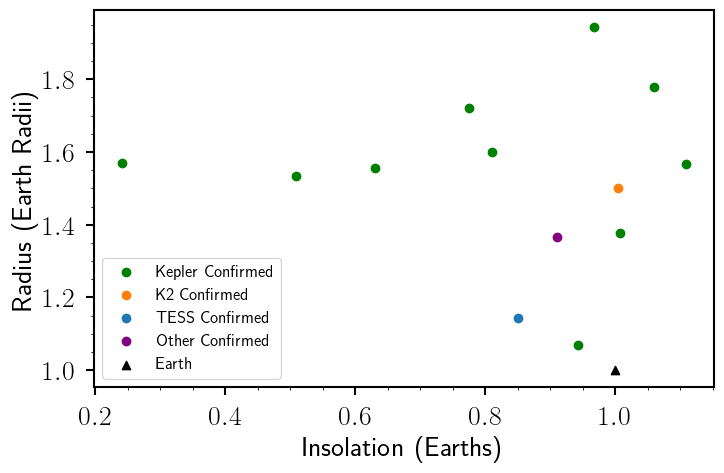

In [41]:
#plt.scatter(comparison['Insolation'].values,comparison['Radius'].values)
#plt.scatter(comparison['Insolation'].values,comparison['rade_est'].values)

plt.scatter(kepler_['Insolation'].values,kepler_['Radius'].values,color = 'green', label = "Kepler Confirmed")
plt.scatter(k2_['Insolation'].values,k2_['Radius'].values,color = 'C1', label = "K2 Confirmed")
plt.scatter(tess_['Insolation'].values,tess_['Radius'].values,color = 'C0', label = "TESS Confirmed")
plt.scatter(other_['Insolation'].values,other_['Radius'].values,color = 'purple', label = "Other Confirmed")
plt.scatter(1,1,color='k',label='Earth',marker="^")



plt.xlabel('Insolation (Earths)')
plt.ylabel('Radius (Earth Radii)')
plt.tick_params(direction='out',width=1.5,length=6,pad=7)
plt.minorticks_on()
plt.legend(loc='lower left', fontsize=12)

#plt.savefig('/Users/lupitatovar/Cool-Worlds/figures/new_targets.pdf',bbox_inches='tight')

Making the mass cuts (less than or equal to 8 Earth Radii)

In [98]:
mass_mask = np.where((comparison['masse'].values <= 8) | (comparison['masse_est'].values <= 8))[0]
len(mass_mask)

2

In [102]:
print(comparison['Planet'].values[mass_mask],comparison['Insolation'].values[mass_mask],comparison['Radius'].values[mass_mask])

['Kepler-1544 b' 'TOI-700 d'] [0.77458663 0.85      ] [1.72227027 1.144     ]


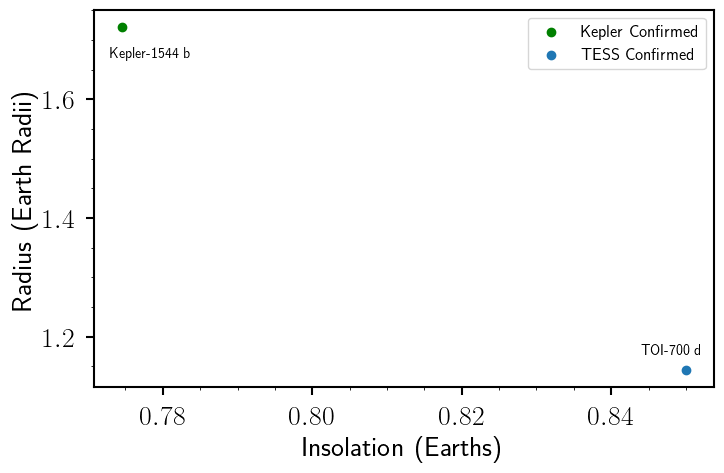

In [122]:
plt.scatter(comparison['Insolation'].values[mass_mask][0],comparison['Radius'].values[mass_mask][0],color = 'green', label = "Kepler Confirmed")
plt.scatter(comparison['Insolation'].values[mass_mask][1],comparison['Radius'].values[mass_mask][1],color = 'C0', label = "TESS Confirmed")
#plt.scatter(comparison['Insolation'].values,comparison['rade_est'].values)

#plt.scatter(kepler_['Insolation'].values,kepler_['Radius'].values,color = 'green', label = "Kepler Confirmed")
#plt.scatter(k2_['Insolation'].values,k2_['Radius'].values,color = 'C1', label = "K2 Confirmed")
#plt.scatter(tess_['Insolation'].values,tess_['Radius'].values,color = 'C0', label = "TESS Confirmed")
#plt.scatter(other_['Insolation'].values,other_['Radius'].values,color = 'purple', label = "Other Confirmed")
#plt.scatter(1,1,color='k',label='Earth',marker="^")



plt.xlabel('Insolation (Earths)')
plt.ylabel('Radius (Earth Radii)')
plt.tick_params(direction='out',width=1.5,length=6,pad=7)
plt.minorticks_on()
plt.legend(fontsize=12)
plt.text(.773, 1.67, 'Kepler-1544 b', fontsize=10)
plt.text(.844, 1.17, 'TOI-700 d', fontsize=10)

#plt.savefig('/Users/lupitatovar/Cool-Worlds/figures/confirmed_m_r_i.pdf',bbox_inches='tight')

### Adding in the Candidates

In [43]:
candidates = pd.read_csv('/Users/lupitatovar/Cool-Worlds/targets/candidates.csv',skiprows=1,
                 names=['Planet','Insolation','Period','Radius','Jup_Radius','Discovery','Status'])
#candidates

,Planet,Insolation,Period,Radius,Jup_Radius,Discovery,Status
0,KOI-4427.01,0.318849,147.661729,1.797673,0.160363,Kepler,Candidate
1,KOI-4848.01,0.160519,384.6961,1.880000,0.167707,Kepler,Candidate
2,KOI-7716.01,0.434274,483.36405,1.503482,0.134120,Kepler,Candidate
3,KOI-4878.01,0.933017,449.01499,1.020524,0.091037,Kepler,Candidate
4,KOI-5087.01,0.332875,651.07431,1.141911,0.101865,Kepler,Candidate
5,KOI-5227.01,0.598983,371.56492,1.611944,0.143795,Kepler,Candidate
6,KOI-5236.01,0.811569,550.86514,1.921435,0.171404,Kepler,Candidate
7,KOI-5130.01,0.430720,370.05918,1.900000,0.169492,Kepler,Candidate
8,KOI-5408.01,0.354582,415.748785,1.710821,0.152616,Kepler,Candidate
9,KOI-5789.01,0.319386,383.26217,1.532865,0.136741,Kepler,Candidate


In [63]:
print(len(candidates))

47


In [59]:
kepler_c = candidates[candidates["Discovery"].str.contains("Kepler")]
k2_c = candidates[candidates["Discovery"].str.contains("K2")]
tess_c = candidates[candidates["Discovery"].str.contains("TESS")]

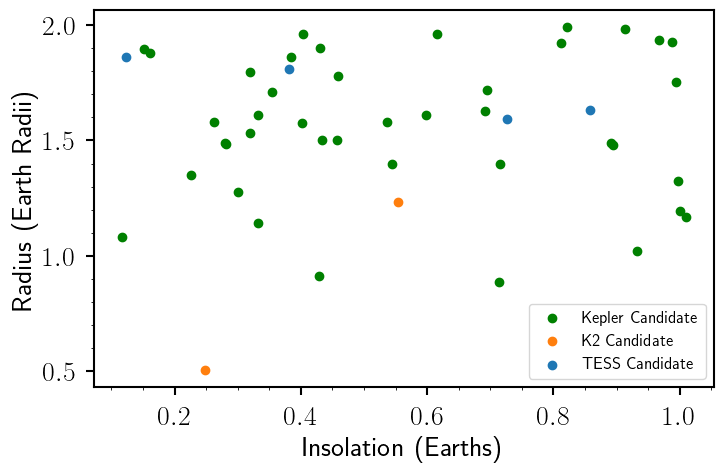

In [62]:
#plt.scatter(candidates['Insolation'].values,candidates['Radius'].values)
plt.scatter(kepler_c['Insolation'].values,kepler_c['Radius'].values,color = 'green', label = "Kepler Candidate")
plt.scatter(k2_c['Insolation'].values,k2_c['Radius'].values,color = 'C1', label = "K2 Candidate")
plt.scatter(tess_c['Insolation'].values,tess_c['Radius'].values,color = 'C0', label = "TESS Candidate")
#plt.scatter(other['Insolation'].values,other['Radius'].values,color = 'purple', label = "Other Confirmed")
#plt.scatter(1,1,color='k',label='Earth',marker="^")


plt.xlabel('Insolation (Earths)')
plt.ylabel('Radius (Earth Radii)')
plt.tick_params(direction='out',width=1.5,length=6,pad=7)
plt.minorticks_on()
plt.legend(fontsize=12)

#plt.savefig('/Users/lupitatovar/Cool-Worlds/figures/candidates_inso_radii.pdf',bbox_inches='tight')

In [47]:
c_frames = [candidates,full_table]
candidate_masses = pd.concat(c_frames, axis=1, join="inner")
#candidate_masses
#candidate_masses.to_csv('/Users/lupitatovar/Cool-Worlds/targets/candidate_masses.csv')
candidate_masses = pd.read_csv('/Users/lupitatovar/Cool-Worlds/targets/candidate_masses.csv')

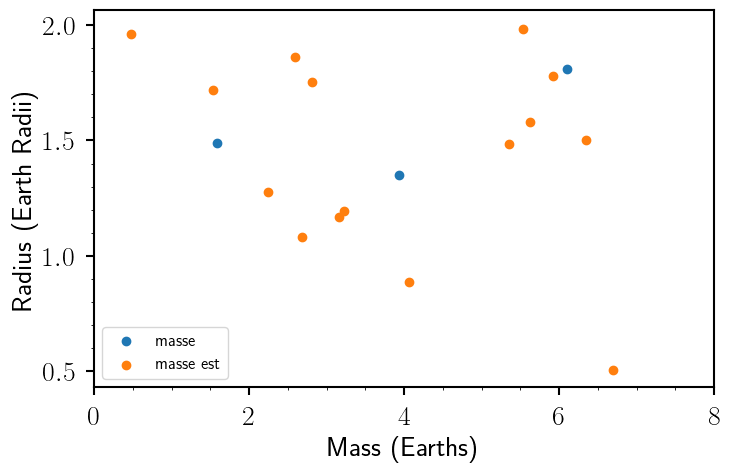

In [65]:
plt.scatter(candidate_masses['masse'].values,candidate_masses['Radius'].values,label='masse')
plt.scatter(candidate_masses['masse_est'].values,candidate_masses['Radius'].values,label='masse est')
plt.xlabel('Mass (Earths)')
plt.ylabel('Radius (Earth Radii)')
plt.tick_params(direction='out',width=1.5,length=6,pad=7)
plt.minorticks_on()
plt.xlim(0,8)
plt.legend(loc='lower left', fontsize=12)

#plt.savefig('/Users/lupitatovar/Cool-Worlds/figures/candidates_inso_radii.pdf',bbox_inches='tight')

In [73]:
# how many values less than mass 8?
print(np.count_nonzero(candidate_masses['masse'].values <= 8))
print(np.count_nonzero(candidate_masses['masse_est'].values <= 8))

3
15


In [ ]:
kepler_c = candidate_masses[candidate_masses["Discovery"].str.contains("Kepler")]
k2_c = candidate_masses[candidate_masses["Discovery"].str.contains("K2")]
tess_c = candidate_masses[candidate_masses["Discovery"].str.contains("TESS")]

In [127]:
# Making a mass cut to match Lynnae's cuts of less than or equal to 8 earth masses
mass_c_mask = np.where((candidate_masses['masse'].values <= 8) | (candidate_masses['masse_est'].values <= 8))[0]
len(mass_c_mask)

18

In [132]:
print(len(np.where(candidate_masses["Discovery"].str.contains("Kepler"))[0]))
print(len(np.where(candidate_masses["Discovery"].str.contains("K2"))[0]))
print(len(np.where(candidate_masses["Discovery"].str.contains("TESS"))[0]))

41
2
4


In [171]:
kepler_c_m = (np.where(candidate_masses["Discovery"][mass_c_mask].str.contains("Kepler"))[0])
k2_c_m = (np.where(candidate_masses["Discovery"][mass_c_mask].str.contains("K2"))[0])
tess_c_m = (np.where(candidate_masses["Discovery"][mass_c_mask].str.contains("TESS"))[0])

In [172]:
candidates['Planet'].values[mass_c_mask]

array(['KOI-7716.01', 'KOI-5609.01', 'KOI-5387.01', 'KOI-5389.01',
       'KOI-5938.01', 'KOI-5949.01', 'KOI-5971.01', 'KOI-5978.01',
       'KOI-5870.01', 'KOI-5893.01', 'KOI-2281.02', 'KOI-6343.01',
       'KOI-7591.01', 'KOI-8107.01', 'KOI-8253.01', 'KOI-8047.01',
       'EPIC 246711015.02', 'TOI-2433.01'], dtype=object)

In [176]:
print('KOIs:', candidates['Planet'].values[kepler_c_m])

KOIs: ['KOI-4427.01' 'KOI-4848.01' 'KOI-7716.01' 'KOI-4878.01' 'KOI-5087.01'
 'KOI-5227.01' 'KOI-5236.01' 'KOI-5130.01' 'KOI-5408.01' 'KOI-5789.01'
 'KOI-5798.01' 'KOI-5556.01' 'KOI-5810.01' 'KOI-5457.01' 'KOI-5715.01'
 'KOI-5609.01']


In [177]:
print('K2 Candidates:', candidates['Planet'].values[k2_c_m])
print('TOIs:', candidates['Planet'].values[tess_c_m])

K2 Candidates: ['KOI-5616.01']
TOIs: ['KOI-5755.01']


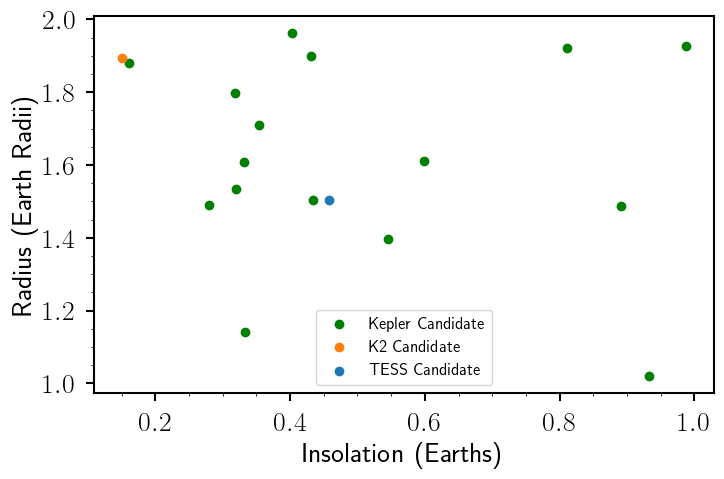

In [178]:
#plt.scatter(candidates['Insolation'].values[mass_c_mask],candidates['Radius'].values[mass_c_mask])

plt.scatter(candidates['Insolation'].values[kepler_c_m],candidates['Radius'].values[kepler_c_m],color = 'green', label = "Kepler Candidate")
plt.scatter(candidates['Insolation'].values[k2_c_m],candidates['Radius'].values[k2_c_m],color = 'C1', label = "K2 Candidate")
plt.scatter(candidates['Insolation'].values[tess_c_m],candidates['Radius'].values[tess_c_m],color = 'C0', label = "TESS Candidate")



plt.xlabel('Insolation (Earths)')
plt.ylabel('Radius (Earth Radii)')
plt.tick_params(direction='out',width=1.5,length=6,pad=7)
plt.minorticks_on()
plt.legend(fontsize=12)

#plt.savefig('/Users/lupitatovar/Cool-Worlds/figures/candidates_m_r_i.pdf',bbox_inches='tight')